# Pre-Processing Data

In [157]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [158]:
# Loading dataset
df = pd.read_csv('data.csv')
df = df.drop_duplicates()
df.head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
5,Exxon Mobil,6,4.0,285640.0,23040.0,63000.0,Energy,Irving,TX,no,no,no,yes,10.0,Darren W. Woods,www.exxonmobil.com,XOM,371841
6,Berkshire Hathaway,7,-1.0,276094.0,89795.0,372000.0,Financials,Omaha,NE,no,no,no,yes,6.0,Warren E. Buffett,www.berkshirehathaway.com,BRKA,625468
7,Alphabet,8,1.0,257637.0,76033.0,156500.0,Technology,Mountain View,CA,no,no,no,yes,9.0,Sundar Pichai,https://www.abc.xyz,GOOGL,1309359
8,McKesson,9,-2.0,238228.0,-4539.0,67500.0,Health Care,Irving,TX,no,no,no,no,7.0,Brian S. Tyler,www.mckesson.com,MCK,47377
9,AmerisourceBergen,10,-2.0,213988.8,1539.9,40000.0,Health Care,Conshohocken,PA,no,no,no,yes,8.0,Steven H. Collis,www.amerisourcebergen.com,ABC,29972


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

1) Dropping unique columns for each company
2) "prev_rank" as half values are missing
3) "profit" column as it directly affects target column

In [160]:
df = df.drop(['company', 'CEO', 'Website', 'Ticker','prev_rank', 'profit'], axis=1)

Dealing with "rank" values which had duplicates, as we will use this column later

In [161]:
# Sort df by rank
df = df.sort_values(by='rank')

# Resetting index to ensure consecutive index values
#df = df.reset_index(drop=True)

# Iterate over the rows and assign sequential ranks
for i in range(len(df)):
    if df.loc[i, 'rank'] != i + 1:
        df.loc[i, 'rank'] = i + 1

# Display the count of each rank
print(df['rank'].value_counts().sort_index(ascending=False))


rank
1000    1
999     1
998     1
997     1
996     1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 1000, dtype: int64


Deleting non numerical values in"Market Cap", "prev_rank" columns

In [162]:
print(df['Market Cap'].replace('-', np.nan).astype(float).isna().sum())
df['Market Cap'] = df['Market Cap'].replace('-', np.nan).astype(float)
df.info()

39
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               1000 non-null   int64  
 1   rank_change        1000 non-null   float64
 2   revenue            1000 non-null   float64
 3   num. of employees  999 non-null    float64
 4   sector             1000 non-null   object 
 5   city               1000 non-null   object 
 6   state              1000 non-null   object 
 7   newcomer           1000 non-null   object 
 8   ceo_founder        1000 non-null   object 
 9   ceo_woman          1000 non-null   object 
 10  profitable         1000 non-null   object 
 11  Market Cap         961 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 133.9+ KB


Binary encoder

In [163]:
# Binary encoding of categorical columns

columns_to_map = ['newcomer', 'ceo_founder', 'ceo_woman', 'profitable']
for column in columns_to_map:
    df[column] = df[column].map({'yes': 1, 'no': 0})

Missing values with KNNI

In [164]:
non_numerical_columns = ['sector', 'city', 'state', 'rank_change']
concatting_columns = ['sector', 'city', 'state', 'rank', 'rank_change']
non_numerical_columns_df = df[non_numerical_columns]
concatting_columns_df = df[concatting_columns] 
df_1 = df.copy()
df_1 = df_1.drop(non_numerical_columns, axis=1)


# Missing value imputation with KNNImputer

imputer = KNNImputer(n_neighbors=5)
# Getting the columns with missing values
columns_with_missing_values = df_1.columns[df_1.isna().any()].tolist()

for column in columns_with_missing_values:
    missing_column = df_1[column]
    missing_column_2d = missing_column.values.reshape(-1, 1)
    imputed_column_2d = imputer.fit_transform(missing_column_2d)
    df_1[column] = imputed_column_2d.flatten()



# Assigning in df_1 the non-numerical columns from df by rank
df_1 = pd.merge(df_1, concatting_columns_df, on='rank', how='left')
df_1 = df_1.drop('rank', axis=1)
df = df_1
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   revenue            1000 non-null   float64
 1   num. of employees  1000 non-null   float64
 2   newcomer           1000 non-null   int64  
 3   ceo_founder        1000 non-null   int64  
 4   ceo_woman          1000 non-null   int64  
 5   profitable         1000 non-null   int64  
 6   Market Cap         1000 non-null   float64
 7   sector             1000 non-null   object 
 8   city               1000 non-null   object 
 9   state              1000 non-null   object 
 10  rank_change        1000 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 86.1+ KB


Understanding a bit better city and state column 

In [165]:
# How many city in each state
k = df['city'].unique()
f = df['state'].unique()
print(f" There are {len(k)} cities")
print(f" There are {len(f)} states")    
city_per_state = df.groupby('state')['city'].nunique().sort_values(ascending=False)
print("Top states by city count:")
city_per_state[:10]

 There are 400 cities
 There are 46 states
Top states by city count:


state
CA    50
PA    26
TX    22
IL    22
MI    22
OH    22
NJ    19
FL    19
MA    16
NY    16
Name: city, dtype: int64

#### Modificating city and state columns, choosing largest 15 state and 50 cities by it's company_count as we cover almost all companies, because of non equal distribuition of companies by states and cities

In [166]:
# Find top 15 states by city count
top_states = df['state'].value_counts().nlargest(15).index

# Mark states that are not in the top 15 as 'state_other'
df['state'] = df['state'].where(df['state'].isin(top_states), 'state_other')

# Find top 50 cities by company count
top_cities = df['city'].value_counts().nlargest(50).index

# Mark cities that are not in the top 50 as 'city_other'
df['city'] = df['city'].where(df['city'].isin(top_cities), 'city_other')

# Now you can perform one-hot encoding on the reduced number of categories
df = pd.get_dummies(df, columns=['state', 'city'], drop_first=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   revenue             1000 non-null   float64
 1   num. of employees   1000 non-null   float64
 2   newcomer            1000 non-null   int64  
 3   ceo_founder         1000 non-null   int64  
 4   ceo_woman           1000 non-null   int64  
 5   profitable          1000 non-null   int64  
 6   Market Cap          1000 non-null   float64
 7   sector              1000 non-null   object 
 8   rank_change         1000 non-null   float64
 9   state_CT            1000 non-null   bool   
 10  state_FL            1000 non-null   bool   
 11  state_GA            1000 non-null   bool   
 12  state_IL            1000 non-null   bool   
 13  state_MA            1000 non-null   bool   
 14  state_MI            1000 non-null   bool   
 15  state_MN            1000 non-null   bool   
 16  state_N

Chossing top 10 sectors by company_count for the same issue with distribution, but telecomunications sector will balance sector_other, as it has majority profitable companies

In [167]:
# One hot sector by top 10 and others
top_10 = df['sector'].value_counts().index[:10]
df['sector'] = df['sector'].apply(lambda x: x if x in top_10 else 'others')
df = pd.get_dummies(df, columns=['sector'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 83 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   revenue                           1000 non-null   float64
 1   num. of employees                 1000 non-null   float64
 2   newcomer                          1000 non-null   int64  
 3   ceo_founder                       1000 non-null   int64  
 4   ceo_woman                         1000 non-null   int64  
 5   profitable                        1000 non-null   int64  
 6   Market Cap                        1000 non-null   float64
 7   rank_change                       1000 non-null   float64
 8   state_CT                          1000 non-null   bool   
 9   state_FL                          1000 non-null   bool   
 10  state_GA                          1000 non-null   bool   
 11  state_IL                          1000 non-null   bool   
 12  state_M

Choosing best number of features

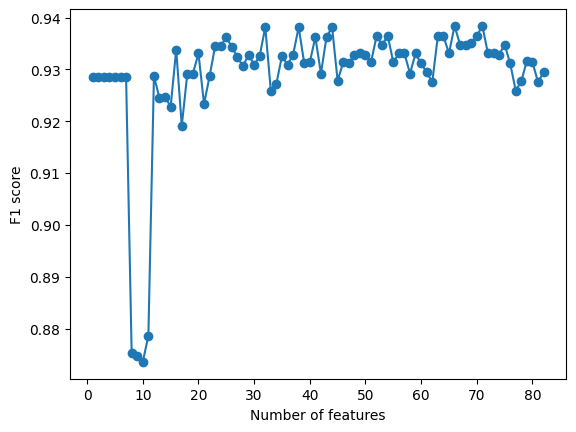

In [168]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('profitable', axis=1)
y = df['profitable']

# Going trough all features and plotting f1 score for feature numbers
f1_scores = []
for i in range(1, len(X.columns) + 1):
    selector = SelectKBest(f_classif, k=i)
    X_new = selector.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.plot(range(1, len(X.columns) + 1), f1_scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('F1 score')
plt.show()




In [169]:
# Select the highest f1 score and use it to select the best features

highest_f1_score = max(f1_scores)
best_number_of_features = f1_scores.index(highest_f1_score) + 1
print("Best number of features:", best_number_of_features)
selector = SelectKBest(f_classif, k=best_number_of_features)
X_new = selector.fit_transform(X, y)

# Get the features that were selected
selected_features = pd.DataFrame(selector.inverse_transform(X_new), index=X.index, columns=X.columns) 
selected_columns = selected_features.columns[selected_features.var() != 0] 
selected_columns  

Best number of features: 66


Index(['revenue', 'num. of employees', 'newcomer', 'ceo_founder', 'ceo_woman',
       'Market Cap', 'rank_change', 'state_FL', 'state_GA', 'state_MA',
       'state_MI', 'state_MN', 'state_NY', 'state_OH', 'state_PA', 'state_TX',
       'state_VA', 'state_state_other', 'city_Atlanta', 'city_Austin',
       'city_Boca Raton', 'city_Boston', 'city_Chicago', 'city_Columbus',
       'city_Dallas', 'city_Deerfield', 'city_Denver', 'city_Detroit',
       'city_Englewood', 'city_Houston', 'city_Indianapolis', 'city_Irving',
       'city_Jacksonville', 'city_Las Vegas', 'city_Los Angeles',
       'city_McLean', 'city_Miami', 'city_Milwaukee', 'city_Nashville',
       'city_New York', 'city_Norwalk', 'city_Oklahoma City', 'city_Orlando',
       'city_Philadelphia', 'city_Phoenix', 'city_Pittsburgh', 'city_Reston',
       'city_Richmond', 'city_San Antonio', 'city_San Diego',
       'city_San Francisco', 'city_San Jose', 'city_Scottsdale',
       'city_St. Louis', 'city_St. Paul', 'city_The Wood

In [170]:
# Returning X and y to df
df = df[selected_columns]
df['profitable'] = y
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   revenue                           1000 non-null   float64
 1   num. of employees                 1000 non-null   float64
 2   newcomer                          1000 non-null   int64  
 3   ceo_founder                       1000 non-null   int64  
 4   ceo_woman                         1000 non-null   int64  
 5   Market Cap                        1000 non-null   float64
 6   rank_change                       1000 non-null   float64
 7   state_FL                          1000 non-null   bool   
 8   state_GA                          1000 non-null   bool   
 9   state_MA                          1000 non-null   bool   
 10  state_MI                          1000 non-null   bool   
 11  state_MN                          1000 non-null   bool   
 12  state_N

# Processing data

Splitting in train and test data

In [171]:
# Shuffle rows of df
df = df.sample(frac=1, random_state=4).reset_index(drop=True)

# Splitting data
y = df['profitable']
X = df.drop('profitable', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Test set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (800, 66) y: (800,)
Test set - X: (200, 66) y: (200,)


Removing 3% of outliers from train set 

In [172]:
# Removing outliers with Isolation Forest
outlier_detector = IsolationForest(contamination=0.03)
outlier_detector.fit(X_train)
no_outliers = outlier_detector.predict(X_train)
no_outliers = no_outliers == 1
X_train, y_train = X_train[no_outliers], y_train[no_outliers]
print("Training set - X:", X_train.shape, "y:", y_train.shape)



Training set - X: (776, 66) y: (776,)


In [173]:
y_train.value_counts()

profitable
1    684
0     92
Name: count, dtype: int64

Learning Curve Function

In [174]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

 Testing models

I will choose SMOTEENN from imperio for class balancing for all models as feature importance is distribuited much better(2nd photo), than to SMOTEEN from imblearn.combine(1st photo), but XgBoost doesn't work with imperio's SMOTEENN

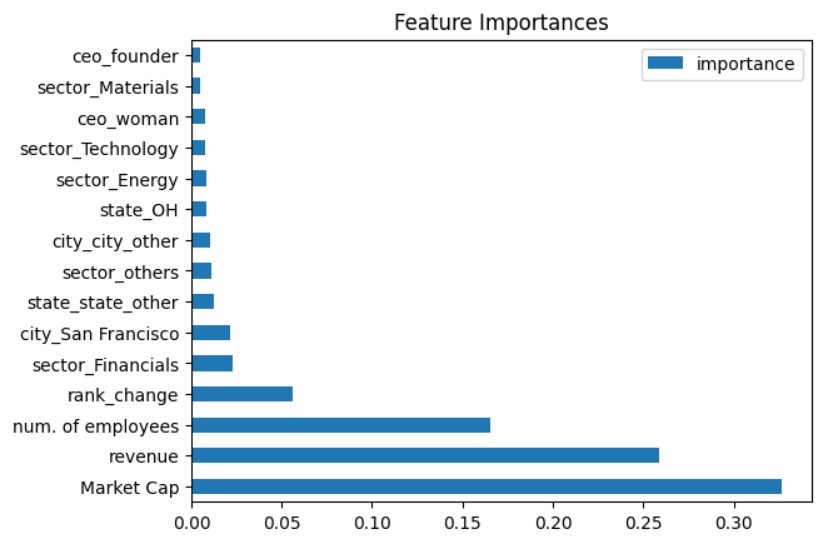

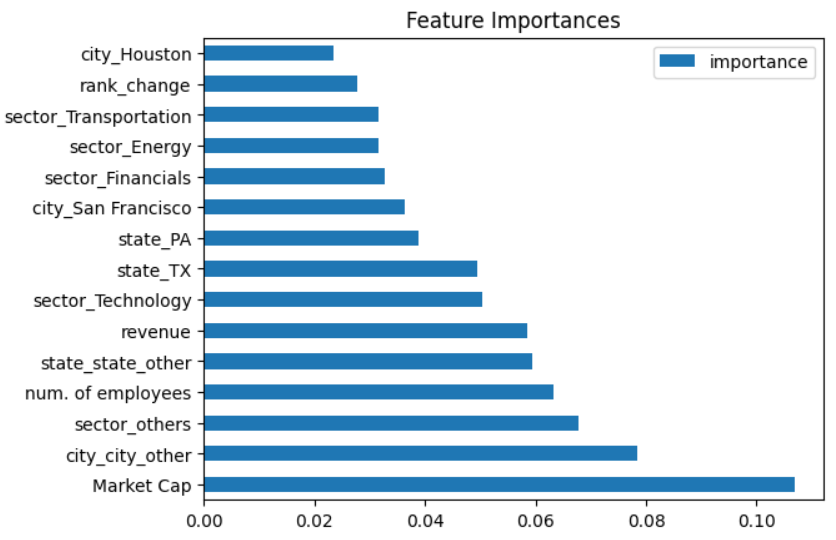

In [175]:
# Applying smote and edited nearest neighbours as 
from imblearn.combine import SMOTEENN

smote = SMOTEENN()
X_train_Xgb, y_train_Xgb = smote.fit_resample(X_train, y_train)

from crucio import SMOTEENN as crucio

# Reset index of X_train and y_train
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Concatenate X_train and y_train
df_smotee = pd.concat([X_train, y_train], axis=1)
smoteenn = crucio()
df_smotee = smoteenn.balance(df_smotee, 'profitable')

# Splitting X_train and y_train
X_train = df_smotee.drop('profitable', axis=1)
y_train = df_smotee['profitable']


In [176]:
y_train.value_counts()

profitable
1    665
0    619
Name: count, dtype: int64

In [177]:
y_train_Xgb.value_counts()

profitable
0    438
1    339
Name: count, dtype: int64

I will focus more on f1 rather roc_auc_score because when you have a data imbalance between positive and negative samples, you should always pay attention more to F1-score because ROC averages over all possible thresholds!


Accuracy: 0.88
Precision: 0.8974358974358975
Recall: 0.9776536312849162
F1: 0.9358288770053476
[[  1  20]
 [  4 175]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

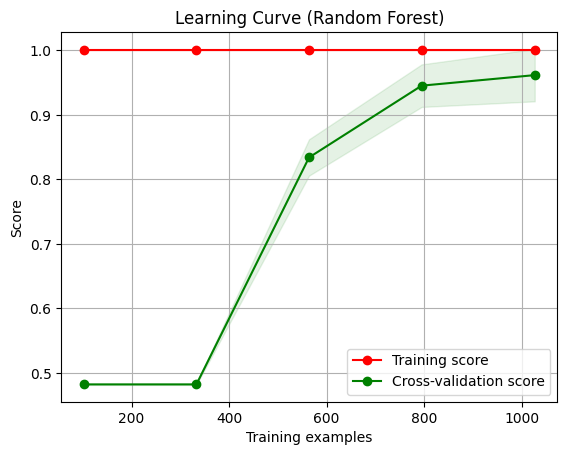

In [178]:
# Random Forest
# Create a RandomForestClassifier
class_weights = {0: 5, 1: 1}
clf_forest = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [None, 25, 50], 
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf_forest, param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a RandomForestClassifier with the best parameters
clf_forest = RandomForestClassifier(class_weight=class_weights, n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])

# Fit the model
clf_forest.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_forest.predict(X_test)

# Print the metrics
accuracy_random_forest = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_random_forest}')

precision_random_forest = precision_score(y_test, y_pred)
print(f'Precision: {precision_random_forest}')

recall_random_forest = recall_score(y_test, y_pred)
print(f'Recall: {recall_random_forest}')

f1_random_forest = f1_score(y_test, y_pred)
print(f'F1: {f1_random_forest}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_forest, 'Learning Curve (Random Forest)', X_train, y_train, cv=5)

                   importance
Market Cap           0.131655
num. of employees    0.082444
sector_others        0.079250
revenue              0.077005
sector_Financials    0.068484
...                       ...
city_Washington      0.000303
city_Milwaukee       0.000245
city_Austin          0.000227
city_Englewood       0.000142
city_St. Paul        0.000135

[66 rows x 1 columns]


Text(0.5, 1.0, 'Feature Importances')

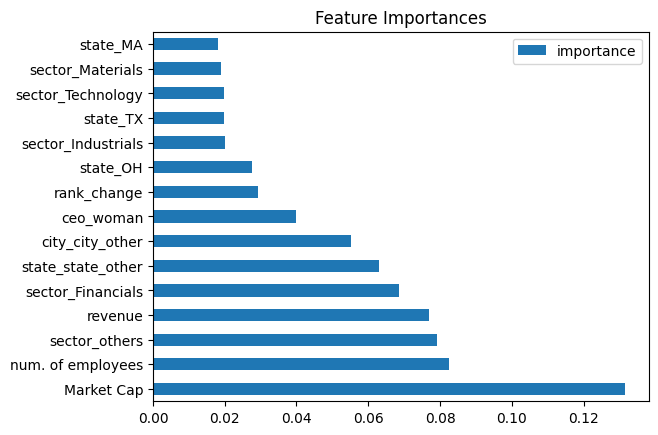

In [179]:
# Feature importance
from pandas import DataFrame as df
feature_importances = df(clf_forest.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

feture_importances = feature_importances.head(15)

# Plot the feature importances
feture_importances.plot(kind='barh')
plt.title('Feature Importances')

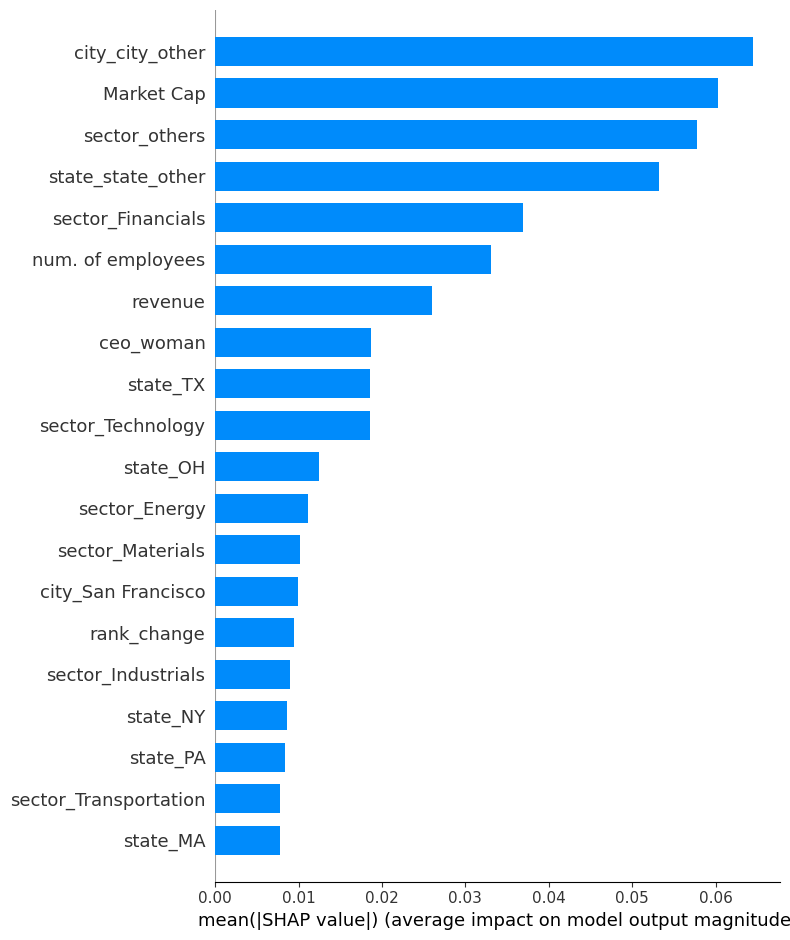

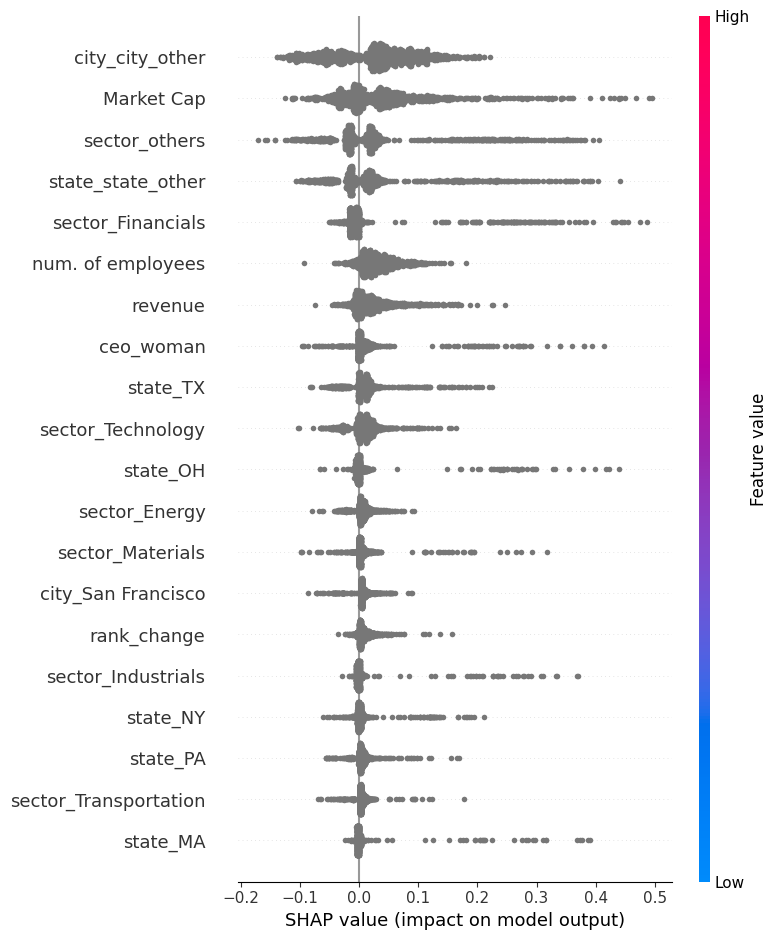

In [180]:
import shap
import pandas as pd

shap.initjs()

# Create a SHAP explainer
explainer = shap.TreeExplainer(clf_forest)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Extract feature names from X_train
feature_names = X_train_df.columns.tolist()

# Plot the SHAP values
shap.summary_plot(shap_values[1], X_train_df, plot_type="bar", feature_names=feature_names)

# Plot the SHAP values
shap.summary_plot(shap_values[1], X_train_df, feature_names=feature_names)



Accuracy: 0.77
Precision: 0.9182389937106918
Recall: 0.8156424581005587
F1: 0.8639053254437871
[[  8  13]
 [ 33 146]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

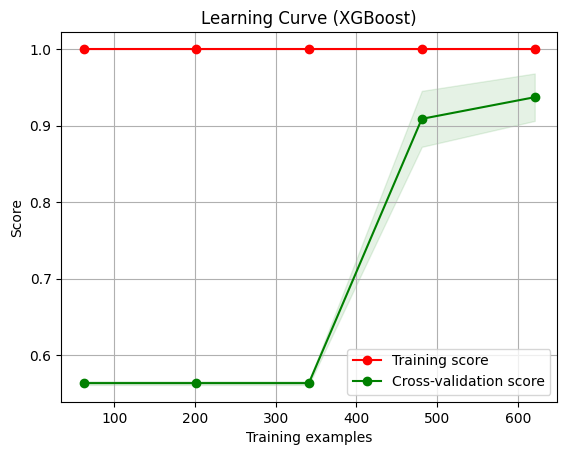

In [181]:
# Xgboost
from xgboost import XGBClassifier

# Create a XGBClassifier

clf_xgb = XGBClassifier( random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 150, 200],  
    'max_depth': [3, 5, 7], 
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf_xgb, param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_Xgb, y_train_Xgb)

# Get the best parameters
best_params = grid_search.best_params_

# Create a XGBClassifier with the best parameters
clf_xgb = XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)

# Fit the model
clf_xgb.fit(X_train_Xgb, y_train_Xgb)

# Predict the labels of the test set
y_pred = clf_xgb.predict(X_test)

# Print the metrics
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_xgb}')

precision_xgb = precision_score(y_test, y_pred)
print(f'Precision: {precision_xgb}')

recall_xgb = recall_score(y_test, y_pred)
print(f'Recall: {recall_xgb}')

f1_xgb = f1_score(y_test, y_pred)
print(f'F1: {f1_xgb}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_xgb, 'Learning Curve (XGBoost)', X_train_Xgb, y_train_Xgb, cv=5)


Accuracy: 0.84
Precision: 0.9152542372881356
Recall: 0.9050279329608939
F1: 0.9101123595505618
[[  6  15]
 [ 17 162]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

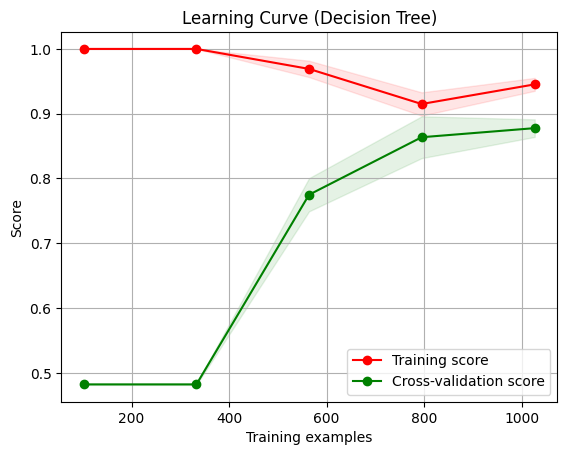

In [182]:
# Create a DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=9)

# Fit the model
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Print the metrics
accuracy_tree = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_tree}')

precision_tree = precision_score(y_test, y_pred)
print(f'Precision: {precision_tree}')

recall_tree = recall_score(y_test, y_pred)
print(f'Recall: {recall_tree}')

f1_tree = f1_score(y_test, y_pred)
print(f'F1: {f1_tree}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf, 'Learning Curve (Decision Tree)', X_train, y_train, cv=5)


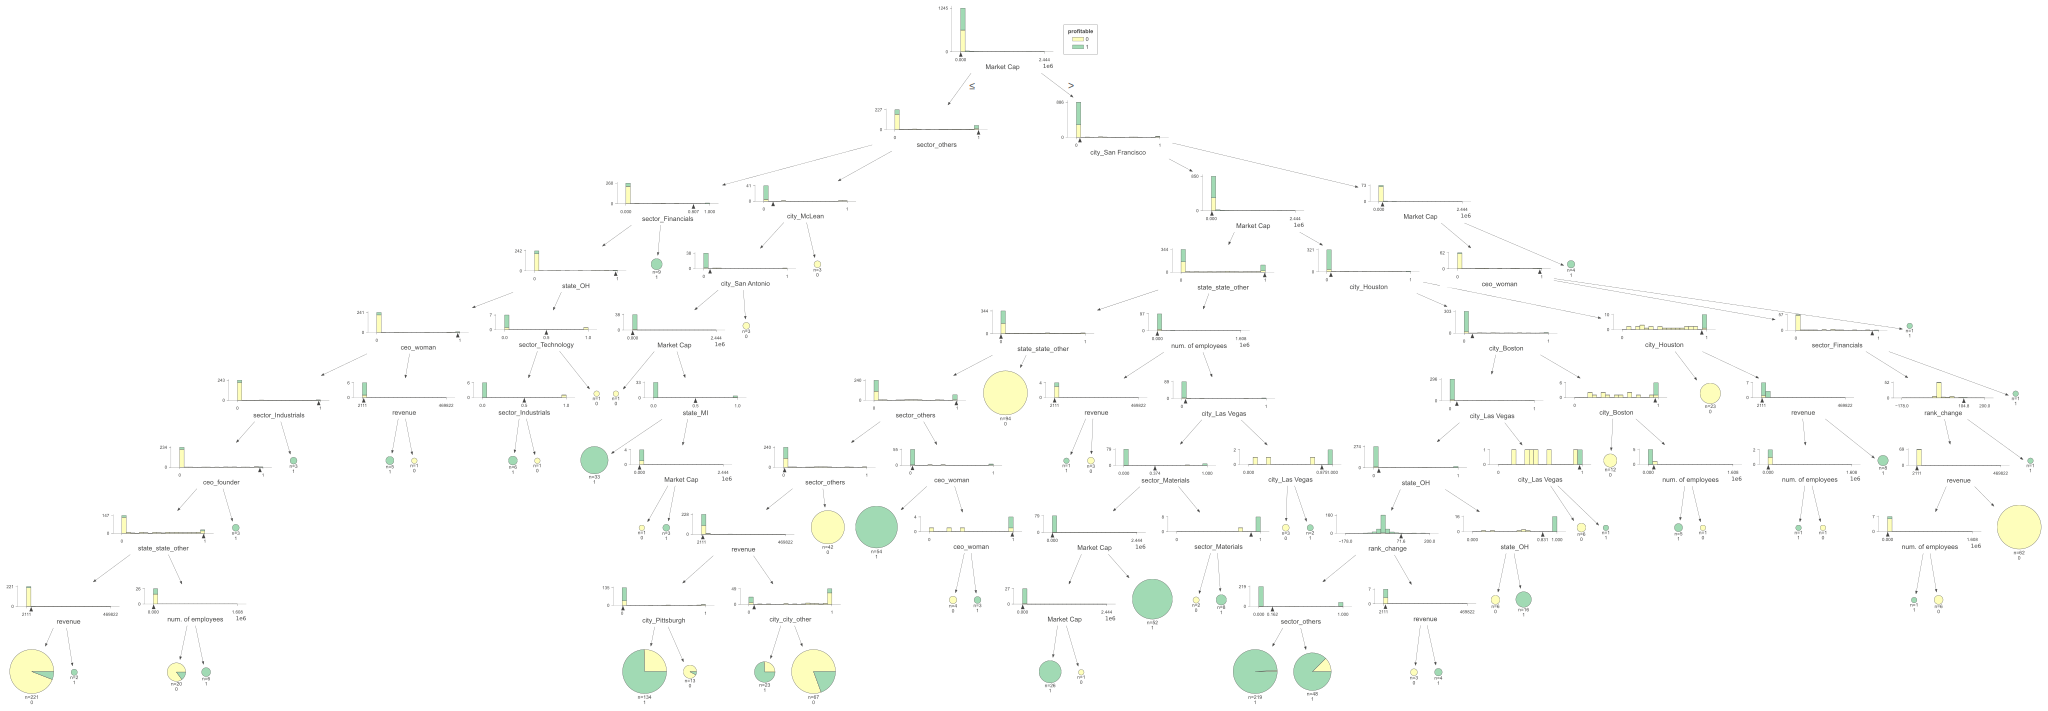

In [183]:
import dtreeviz

# Convert X_train and y_train to pandas DataFrames
X_df = pd.DataFrame(X_train, columns=X.columns)
y_df = pd.Series(y_train, name='profitable')

viz = dtreeviz.model(clf,
                     X_df,
                     y_df,
                     target_name='profitable',
                     feature_names=X_df.columns,
                     class_names=[str(i) for i in np.unique(y_train)]
                    )

# Displaying the tree visualization
viz.view()

As we can see for Decision Tree Classifier the most important feature is Market Cap

In [184]:
#Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.82
Precision: 0.9181286549707602
Recall: 0.8770949720670391
F1: 0.8971428571428571
[[  7  14]
 [ 22 157]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

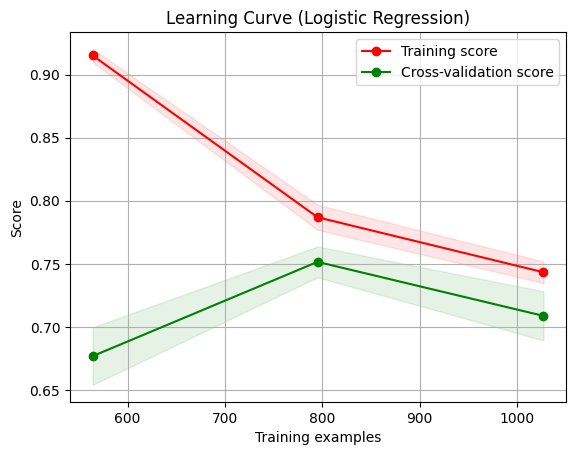

In [195]:
from sklearn.model_selection import learning_curve
# Assigning class weights
class_weights = {0: 1, 1: 2}

# Logistic Regression
logistic_model = LogisticRegression(class_weight=class_weights)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_logistic}')
precision_logistic = precision_score(y_test, y_pred)
print(f'Precision: {precision_logistic}')
recall_logistic = recall_score(y_test, y_pred)
print(f'Recall: {recall_logistic}')
f1_logistic = f1_score(y_test, y_pred)
print(f'F1: {f1_logistic}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plot_learning_curve(logistic_model, 'Learning Curve (Logistic Regression)', X_train, y_train, cv=5)

Accuracy: 0.855
Precision: 0.9166666666666666
Recall: 0.9217877094972067
F1: 0.9192200557103063
[[  6  15]
 [ 14 165]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

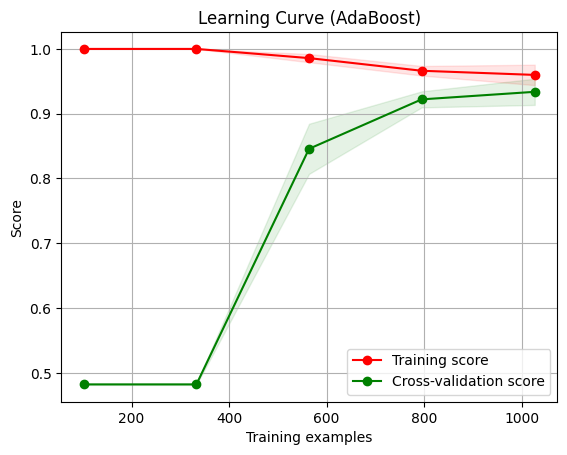

In [186]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
class_weights = {0: 3, 1: 1}
# Create a DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth=1, class_weight=class_weights, random_state=42)

# Create an AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(estimator=clf_tree, random_state=42)

# Fit the AdaBoostClassifier
clf_adaboost.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_adaboost.predict(X_test)

# Print the metrics
accuracy_adaboost = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_adaboost}')

precision_adaboost = precision_score(y_test, y_pred)
print(f'Precision: {precision_adaboost}')

recall_adaboost = recall_score(y_test, y_pred)
print(f'Recall: {recall_adaboost}')

f1_adaboost = f1_score(y_test, y_pred)
print(f'F1: {f1_adaboost}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_adaboost, 'Learning Curve (AdaBoost)', X_train, y_train, cv=5)


Accuracy: 0.77
Precision: 0.9182389937106918
Recall: 0.8156424581005587
F1: 0.8639053254437871
[[  8  13]
 [ 33 146]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

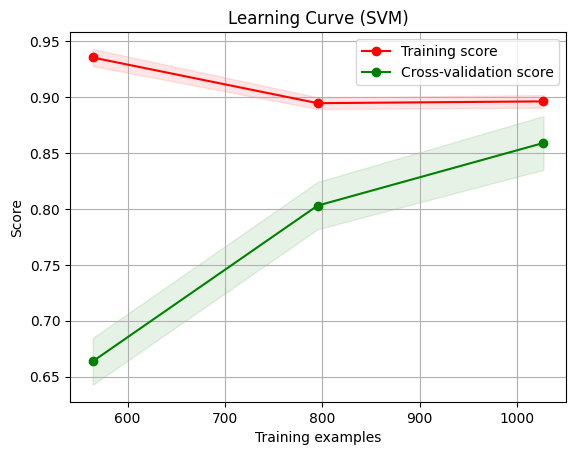

In [193]:
# SVM classifier
from sklearn.svm import SVC
class_weights = {0: 3, 1: 2}
# Create a SVM classifier
clf_svm = SVC(class_weight=class_weights, random_state=42)

# Fit the model
clf_svm.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_svm.predict(X_test)

# Print the metrics
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_svm}')

precision_svm = precision_score(y_test, y_pred)
print(f'Precision: {precision_svm}')

recall_svm = recall_score(y_test, y_pred)
print(f'Recall: {recall_svm}')

f1_svm = f1_score(y_test, y_pred)
print(f'F1: {f1_svm}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_svm, 'Learning Curve (SVM)', X_train, y_train, cv=5)


Accuracy: 0.75
Precision: 0.910828025477707
Recall: 0.7988826815642458
F1: 0.8511904761904762
[[  7  14]
 [ 36 143]]


<module 'matplotlib.pyplot' from 'C:\\Users\\Simion\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

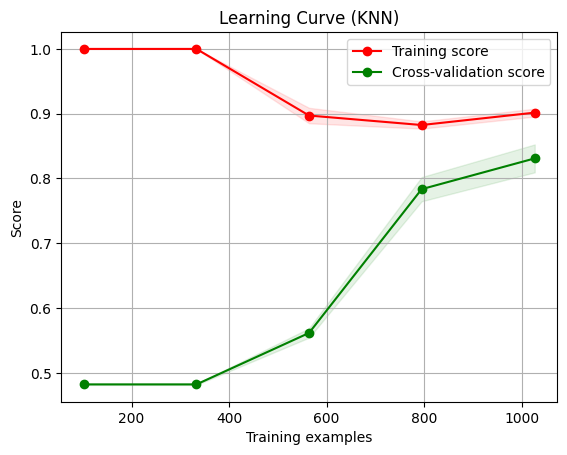

In [192]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
clf_knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf_knn.predict(X_test)

# Print the metrics
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_knn}')

precision_knn = precision_score(y_test, y_pred)
print(f'Precision: {precision_knn}')

recall_knn = recall_score(y_test, y_pred)
print(f'Recall: {recall_knn}')

f1_knn = f1_score(y_test, y_pred)
print(f'F1: {f1_knn}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the learning curve
plot_learning_curve(clf_knn, 'Learning Curve (KNN)', X_train, y_train, cv=5)

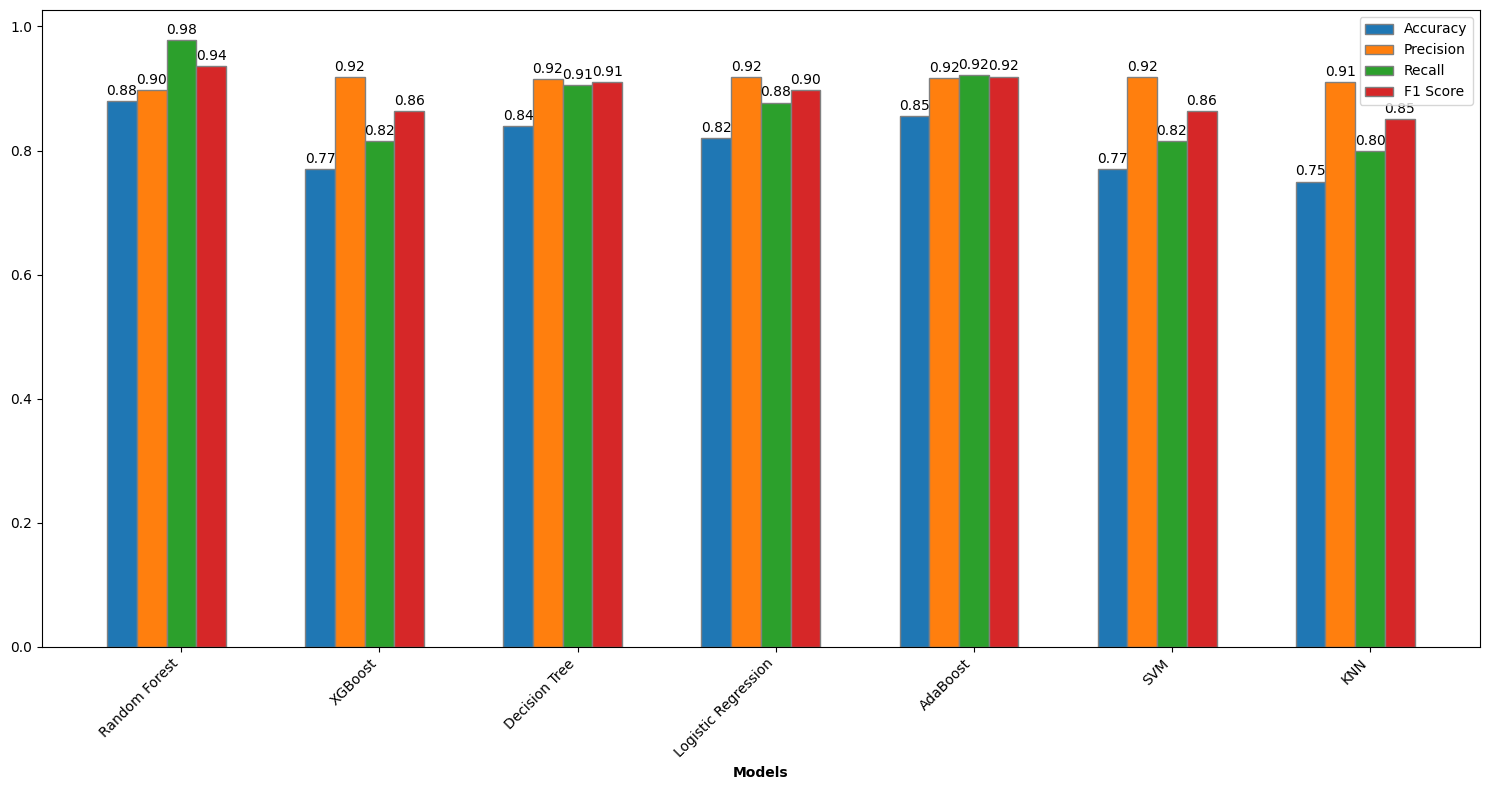

In [197]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'XGBoost', 'Decision Tree', 'Logistic Regression', 'AdaBoost', 'SVM', 'KNN']

# Metrics for each model
accuracy = [accuracy_random_forest, accuracy_xgb, accuracy_tree, accuracy_logistic, accuracy_adaboost, accuracy_svm, accuracy_knn]

precision = [precision_random_forest, precision_xgb, precision_tree, precision_logistic, precision_adaboost, precision_svm, precision_knn]

recall = [recall_random_forest, recall_xgb, recall_tree, recall_logistic, recall_adaboost, recall_svm, recall_knn]

f1 = [f1_random_forest, f1_xgb, f1_tree, f1_logistic, f1_adaboost, f1_svm, f1_knn]

# Bar width
bar_width = 0.15

# Set up the bar positions
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create bar plots
fig, ax = plt.subplots(figsize=(15, 8))  
ax.bar(r1, accuracy, width=bar_width, edgecolor='grey', label='Accuracy')
ax.bar(r2, precision, width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r3, recall, width=bar_width, edgecolor='grey', label='Recall')
ax.bar(r4, f1, width=bar_width, edgecolor='grey', label='F1 Score')

# Add metric values at the top of each bar
for r, acc, prec, rec, f1_val in zip(r1, accuracy, precision, recall, f1):
    ax.text(r, acc + 0.01, f'{acc:.2f}', ha='center')
    ax.text(r + bar_width, prec + 0.01, f'{prec:.2f}', ha='center')
    ax.text(r + 2*bar_width, rec + 0.01, f'{rec:.2f}', ha='center')
    ax.text(r + 3*bar_width, f1_val + 0.01, f'{f1_val:.2f}', ha='center')

# Add x-axis labels and legend
ax.set_xlabel('Models', fontweight='bold')
ax.set_xticks([r + 2*bar_width for r in range(len(models))])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In conclusion boosting algorithms especially Random Forest and AdaBoost performed much better on this dataset as linear approaches. Logistic Regression is a linear model because of underlying relationship in the data that is not linear, it might underfit, which is reflected by lower performance scores across the board and specific learning curve.